In [1]:
# Sneha Dubey
# Dr. Cui
# CSEN 240
# 13 October 2024

In [2]:
# Homework 1 Problem 2

In [3]:
# Imports
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load & Clean the Data

In [5]:
file = "./pima-indians-diabetes.xlsx"
originalData = pd.read_excel(file)

originalData.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
hasDiabetes = originalData[originalData['Outcome'] == 1]
noDiabetes = originalData[originalData['Outcome'] == 0]

In [7]:
# Step 2: Run the Experiment (saving each accuracy result)

In [8]:
def runExperiment(n):
    hasDiabetesTrain = hasDiabetes.sample(n = n)
    noDiabetesTrain = noDiabetes.sample(n = n)

    trainingData = pd.concat([hasDiabetesTrain, noDiabetesTrain])
    testingData = originalData.drop(trainingData.index)

    X_train = trainingData.drop('Outcome', axis=1).values
    y_train = trainingData['Outcome'].values.reshape(-1, 1)
    X_test = testingData.drop('Outcome', axis=1).values
    y_test = testingData['Outcome'].values.reshape(-1, 1)
    m = X_train.shape[1]

    X_train_tf = tf.constant(X_train, dtype=tf.float32)
    y_train_tf = tf.constant(y_train, dtype=tf.float32)
    X_test_tf = tf.constant(X_test, dtype=tf.float32)
    y_test_tf = tf.constant(y_test, dtype=tf.float32)
    XT = tf.transpose(X_train_tf)
    w = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X_train_tf)), XT), y_train_tf)

    y_pred_train = tf.matmul(X_train_tf, w)
    MSE_train = tf.reduce_mean(tf.square(y_train_tf - y_pred_train))

    y_pred_test = tf.matmul(X_test_tf, w)
    MSE_test = tf.reduce_mean(tf.square(y_test_tf - y_pred_test))
    predicted_classes = tf.where(y_pred_test >= 0.5, 1.0, 0.0)

    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_classes, y_test_tf), tf.float32))

    return accuracy.numpy()

In [9]:
numExperiments = 1000
possibleN = [40, 80, 120, 160, 200]
averageAccuracies = [0, 0, 0, 0, 0]

n40Accuracies = 0
currN = possibleN[0]
for currExperiment in range(0, numExperiments):
    currAccuracy = runExperiment(currN)
    n40Accuracies += currAccuracy
averageAccuracies[0] = (n40Accuracies/numExperiments) * 100

n80Accuracies = 0
currN = possibleN[1]
for currExperiment in range(0, numExperiments):
    currAccuracy = runExperiment(currN)
    n80Accuracies += currAccuracy
averageAccuracies[1] = (n80Accuracies/numExperiments) * 100

n120Accuracies = 0
currN = possibleN[2]
for currExperiment in range(0, numExperiments):
    currAccuracy = runExperiment(currN)
    n120Accuracies += currAccuracy
averageAccuracies[2] = (n120Accuracies/numExperiments) * 100

n160Accuracies = 0
currN = possibleN[3]
for currExperiment in range(0, numExperiments):
    currAccuracy = runExperiment(currN)
    n160Accuracies += currAccuracy
averageAccuracies[3] = (n160Accuracies/numExperiments) * 100

n200Accuracies = 0
currN = possibleN[4]
for currExperiment in range(0, numExperiments):
    currAccuracy = runExperiment(currN)
    n200Accuracies += currAccuracy
averageAccuracies[4] = (n200Accuracies/numExperiments) * 100

In [10]:
print(possibleN)
print(averageAccuracies)

[40, 80, 120, 160, 200]
[68.72223835587502, 70.57828951478004, 71.29469687342643, 71.9392856836319, 72.27364135980606]


In [11]:
# Step 3: Plot the Results

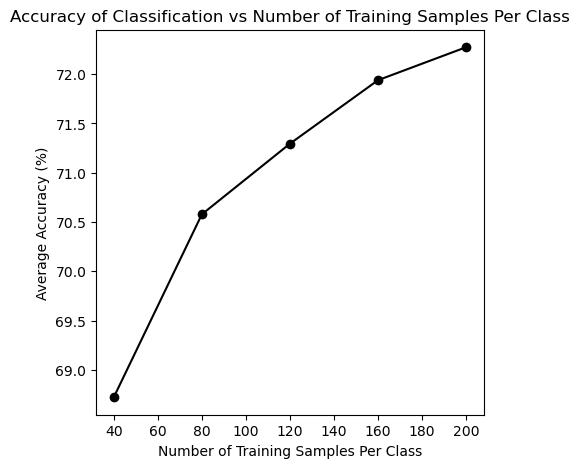

In [12]:
plt.figure(figsize=(5, 5))
plt.plot(possibleN, averageAccuracies, marker='o', color='black')
plt.title('Accuracy of Classification vs Number of Training Samples Per Class')
plt.xlabel('Number of Training Samples Per Class')
plt.ylabel('Average Accuracy (%)')
plt.show()

In [13]:
# Complete!